# Etude des films et séries disponibles sur Netflix jusq'au début d'année 2021

Dans ce projet, nous sommes amenés à travailler sur un dataset regroupant l'ensemble des films et séries disponibles sur 
netflix jusqu'au début d'année 2021. Le dataset est disponible sur kaggle à l'adresse : [https://www.kaggle.com/shivamb/netflix-shows](https://www.kaggle.com/shivamb/netflix-shows)

# On importe les différentes librairies utile à notre analyse

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
palette = sns.color_palette([ '#e74c3c','#3498db'])
sns.set_palette(palette)
sns.set_style('darkgrid')

# Lecture de notre jeu de donnéées

In [3]:
netflix_data = pd.read_csv('netflix_titles.csv', index_col=[0])
netflix_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Présentation de notre jeu de données

Notre jeu de données contient **12** variables:

- **show_id** : correspond à l'ID unique du film ou de la série
    
- **type** : permet de dire s'il s'agit d'un film ("Movie") ou d'une série televisée ("TV Show")

- **title** : le titre du film ou de la série

- **director** : le directeur de production

- **cast**: les acteurs présents dans le film/la série

- **country**: le pays dans lequel le film/la série a été produit

- **date_added**: date à laquelle le film/la série a été ajouté sur netflix

- **release_year**: l'année de sortie réelle du film/de la série

- **rating**: classement du contenu (TV-MA, TV-14, TV-PG, R, PG-13, NR, TV-Y7, TV-G, TV-Y, TV-Y7-FV, G, UR, NC-17). Pour voir la signification des différents classements de contenu : [https://fr.wikipedia.org/wiki/TV_Parental_Guidelines](https://fr.wikipedia.org/wiki/TV_Parental_Guidelines)

- **duration**: pour les films - durée du film en minutes. Pour les séries - nombre de saisons

- **listed_in**: la ou les categories du film/de la série (drame, comédie, documentaire, etc.)

- **description**: description du film ou de la série.

# Dimension du dataframe

In [4]:
netflix_data.shape

(7787, 11)

# Comptons le nombre de films et de séries de notre jeu de données

In [5]:
netflix_data['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

Dans notre jeu de données, il y a **5377 films** et **2410 séries**

# Générons le résumé statistique du dataframe

In [7]:
netflix_data.describe(include='all')

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,Movie,#FriendButMarried 2,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


# Comptons les valeurs manquantes dans le dataframe

In [8]:
netflix_data.isna().sum()

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

# Explorons les données manquantes

## Sur la colonne des directeurs de production

In [9]:
#Selectionnons d'abord dans un prémier temps les données manquantes dans la colonne "director" puis comptons 
#les films et séries sans directeur de production
#Les films et séries qui n'ont pas de directeurs de production
netflix_data.loc[netflix_data['director'].isna()]['type'].value_counts()

TV Show    2226
Movie       163
Name: type, dtype: int64

Nous constatons que **163 films** et **2226 series** sont sans directeurs de production. 

## Sur la colonne des acteurs

In [8]:
netflix_data.loc[netflix_data['cast'].isna()]['type'].value_counts()

Movie      426
TV Show    292
Name: type, dtype: int64

Nous constatons que **426** films et **292** series sont sans acteurs. 

In [9]:
#Selection des films et séries sans acteurs puis voyons le top 10 des catégories sans acteurs 
sans_acteur = netflix_data.loc[netflix_data['cast'].isna()]
sans_acteur.loc[:, 'listed_in'].value_counts()[:10]

Documentaries                                         166
Documentaries, International Movies                   107
Docuseries                                             39
Crime TV Shows, Docuseries                             31
Reality TV                                             25
Documentaries, Sports Movies                           23
Kids' TV                                               21
Crime TV Shows, Docuseries, International TV Shows     19
Documentaries, Music & Musicals                        19
Documentaries, International Movies, Sports Movies     19
Name: listed_in, dtype: int64

On constate que les films/séries sans acteurs sont bien des **documentaires**, ce qui justifie l'absence d'un cast.

# Taille des lignes dupliquées

In [10]:
netflix_data[netflix_data.duplicated()].shape

(0, 11)

Notre ensemble de données **netflix_data** ne contient pas de lignes dupliquées

# Comptons l'ensemble des films/séries produit par la France et les Etats-Unis

In [12]:
netflix_data.loc[(netflix_data['country'] == 'France') | (netflix_data['country'] == 'United States')].shape[0]

2670

# Films/séries produit par les Etats-Unis

In [14]:
netflix_data[netflix_data['country'] == 'United States'].shape

(2555, 11)

# Films/séries produit par la France

In [16]:
netflix_data.loc[netflix_data['country'] == 'France'].shape

(115, 11)

Il y a bien moins de contenu produit en France et disponible sur Netflix que de contenu produit aux Etats-Unis. Affichons un aperçu du contenu produit en france.

# Afficher le contenu le plus vieux disponible sur Netflix

In [11]:
netflix_data.loc[netflix_data['release_year'] == netflix_data['release_year'].min()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s4868,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...


# Le film avec la durée la plus longue sur netflix

In [12]:
#Créons un sous-ensemble avec uniquement les films
movie = netflix_data[netflix_data['type'] == "Movie"]

#Créons une nouvelle colonne à partir de la colonne "duration" en y apportant des modifications
movie['duration_min'] = movie.loc[:,'duration'].str.replace("min", "").astype(int)

#Trions et affichons les 5 films avec la durée la plus longue
movie.sort_values('duration_min', ascending=False).head(n=5)

<ipython-input-12-6662fee215a9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['duration_min'] = movie.loc[:,'duration'].str.replace("min", "").astype(int)


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_min
show_id,,,,,,,,,,,,
s958,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",312
s6851,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,"May 21, 2020",1973,TV-14,253 min,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...,253
s4491,Movie,No Longer kids,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,"May 21, 2020",1979,TV-14,237 min,"Comedies, Dramas, International Movies",Hoping to prevent their father from skipping t...,237
s3695,Movie,Lock Your Girls In,Fouad El-Mohandes,"Fouad El-Mohandes, Sanaa Younes, Sherihan, Ahm...",NaN,"May 21, 2020",1982,TV-PG,233 min,"Comedies, International Movies, Romantic Movies",A widower believes he must marry off his three...,233
s5109,Movie,Raya and Sakina,Hussein Kamal,"Suhair El-Babili, Shadia, Abdel Moneim Madboul...",NaN,"May 21, 2020",1984,TV-14,230 min,"Comedies, Dramas, International Movies",When robberies and murders targeting women swe...,230


# Etudions les catégories avec le plus de contenu sur netflix

In [21]:
categories = pd.Series(", ".join(netflix_data['listed_in'].dropna()).split(", "))
categories.value_counts().head()

International Movies      2437
Dramas                    2106
Comedies                  1471
International TV Shows    1199
Documentaries              786
dtype: int64

On peut conclure que la catégorie avec le plus de contenu est la catégorie **International Movies**, suivi par **Dramas** et **Comedies**.

# Afficher les directeurs qui ont produit le plus de films/séries disponibles sur Netflix

In [29]:
director = pd.Series(", ".join(netflix_data['director'].dropna()).split(", "))
director.value_counts().head(10)

Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Steven Spielberg       10
Anurag Kashyap          9
dtype: int64

**Jan Suter**, **Raúl Campos**, **Jay Karas** et **Marcus Raboy** sont les directeurs de production qui ont le plus de films/séries sur Netflix.

# Voyons si le directeur de production "Jan Suter" travaille souvent avec les mêmes acteurs

In [16]:
data = netflix_data[netflix_data['director'].notna()]
data_jan_suter = data[data['director'].str.contains("Jan Suter")]
data_jan_suter

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s371,Movie,Alan Saldaña: Mi vida de pobre,"Raúl Campos, Jan Suter",Alan Saldaña,Mexico,"August 4, 2017",2017,TV-MA,54 min,Stand-Up Comedy,Mexican comic Alan Saldaña has fun with everyt...
s569,Movie,Arango y Sanint: Ríase el show,"Raúl Campos, Jan Suter","Julián Arango, Antonio Sanint",Colombia,"January 17, 2018",2018,TV-MA,62 min,Stand-Up Comedy,Colombian stand-up comedians Antonio Sanint an...
s1220,Movie,Carlos Ballarta: El amor es de putos,"Jan Suter, Raúl Campos Delgado",Carlos Ballarta,Mexico,"November 21, 2016",2016,TV-MA,67 min,Stand-Up Comedy,"Carlos Ballarta mocks daily life in Mexico, in..."
s1221,Movie,Carlos Ballarta: Furia Ñera,"Raúl Campos, Jan Suter",Carlos Ballarta,Mexico,"May 11, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Mexican comic Carlos Ballarta mocks himself an...
s1444,Movie,Coco y Raulito: Carrusel de ternura,"Raúl Campos, Jan Suter","Coco Celis, Raúl Meneses",Mexico,"July 27, 2018",2018,TV-MA,57 min,Stand-Up Comedy,"A study in contrasts, comedy partners and good..."
s1603,Movie,Daniel Sosa: Sosafado,"Raúl Campos, Jan Suter",Daniel Sosa,Mexico,"February 3, 2017",2017,TV-MA,78 min,Stand-Up Comedy,Comedian Daniel Sosa inhabits various characte...
s1957,Movie,"El Especial de Alex Fernández, el Especial",Jan Suter,Alex Fernández,Mexico,"October 13, 2017",2017,TV-MA,52 min,Stand-Up Comedy,"From a Mexico City theme park, energetic stand..."
s2149,Movie,Fernando Sanjiao: Hombre,"Raúl Campos, Jan Suter",Fernando Sanjiao,Argentina,"May 25, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Argentine actor and comedian Fernando Sanjiao ...
s3124,Movie,Jani Dueñas: Grandes fracasos de ayer y hoy,"Raúl Campos, Jan Suter",Jani Dueñas,Chile,"June 29, 2018",2018,TV-MA,77 min,Stand-Up Comedy,Chilean comedian and personality Jani Dueñas p...


In [17]:
#Affichons les 5 acteurs avec lesquels "Jan Suter travaille le plus"
actor_work_jan = pd.Series(", ".join(data_jan_suter['cast']).split(", "))
actor_work_jan.value_counts().head()

Carlos Ballarta         3
Sofía Niño de Rivera    3
Ricardo O'Farrill       2
Luciano Mellera         1
Raúl Meneses            1
dtype: int64

**Conclusion**: On peut conclure que Jan Suter ne travaille pas toujours avec les mêmes acteurs. Sur ses 21 productions disponibles sur Netflix, 3 acteurs sont présents dans plusieurs de ces productions, 3 fois ou 2 fois.

# Représentons les 10 pays qui ont produit le plus de contenus disponibles sur Netflix, avec le nombre de contenus par pays.

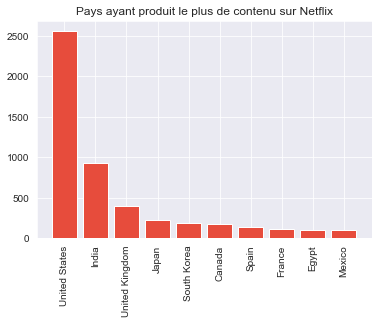

In [15]:
# Avec Matplotlib
x = netflix_data['country'].value_counts()[:10].keys()
y = netflix_data['country'].value_counts()[:10].values
plt.title("Pays ayant produit le plus de contenu sur Netflix")
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

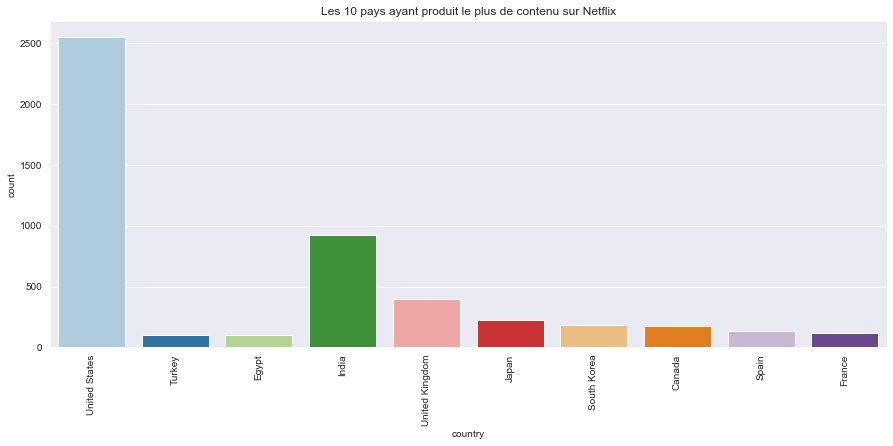

In [39]:
# Autre methode avec seaborn*
plt.figure(figsize=(15,6))
top_10_country = netflix_data["country"].value_counts()[:10]
data_country = netflix_data[netflix_data["country"].isin(top_10_country.index)]
sns.countplot(data = data_country, x="country", palette="Paired")
plt.title("Les 10 pays ayant produit le plus de contenu sur Netflix")
plt.xticks(rotation=90)
plt.show()

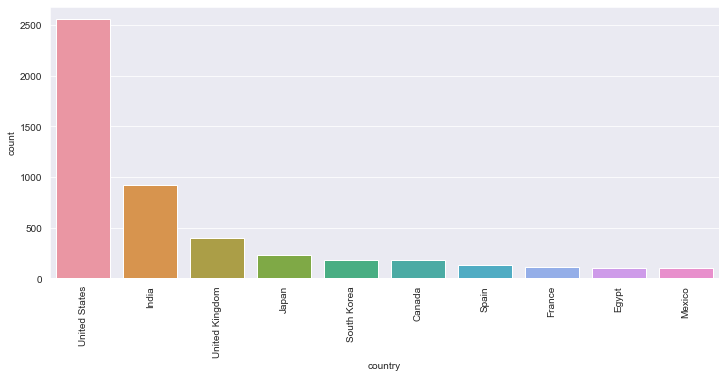

In [14]:
# Avec trie des index
plt.figure(figsize=(12,5))
dix_pays = netflix_data['country'].value_counts().keys()[:10]
data_10 = netflix_data[netflix_data['country'].isin(dix_pays)]
sns.countplot(data=data_10, x='country', order=dix_pays)
plt.xticks(rotation=90)
plt.show()

# Traçons un graphique à barres du nombre de films/séries par classement de contenu(rating)

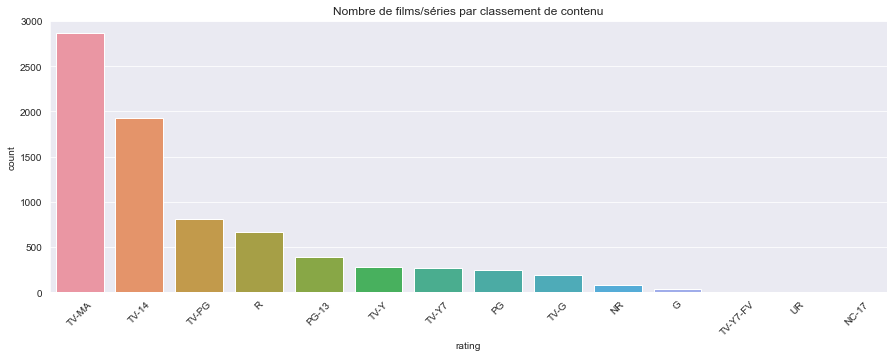

In [18]:
liste_rating = netflix_data['rating'].value_counts().keys()
plt.figure(figsize=(15,5))
sns.countplot(data=netflix_data, x='rating', order=liste_rating)
plt.title("Nombre de films/séries par classement de contenu")
plt.xticks(rotation=45)
plt.show()

Nous l'avions constaté lors de l'utilisation de la méthode describe(), le classement TV-MA possède le plus de contenus (inapproprié pour les jeunes de moins de 17 ans). Suivi de prêt par le contenu TV-14 ( inappropriés pour les jeunes de moins de 14 ans). TV-PG signifie : inappropriés pour les enfants. De même, R n'est pas conseillé pour les moins de 17 ans. Globalement, on peut en conclure qu'il faut faire attention au contenu Netflix pour les enfants. Heureusement, il est possible de créer des profils pour les enfants sur Netflix, qui filtre l'ensemble du contenu inaproprié.

# Evolution du nombre de films/séries disponibles sur Netflix au cours du temps

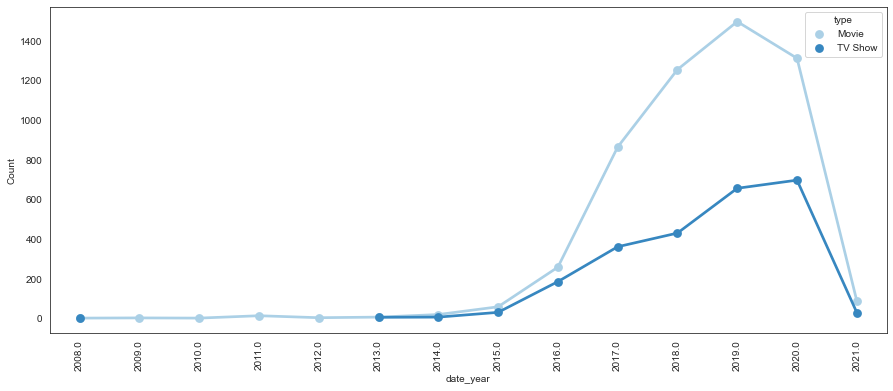

In [31]:
import datetime as dt
netflix_data['date_year'] = pd.to_datetime(netflix_data['date_added']).dt.year
data_pointplot = netflix_data.groupby(['date_year', 'type']).size().reset_index(name='Count')
plt.figure(figsize=(15,6))
sns.set_style('white')
sns.pointplot(data=data_pointplot, x='date_year', y='Count', hue='type', palette="Blues")
plt.xticks(rotation=90)
plt.show()

On constate un boom d'ajout de contenus à partir de 2014, avec une courbe qui ne cesse d'augmenter jusqu'en 2019. La valeur à l'année 2021 est trompeuse, ce jeu de données s'arrête à l'année 2020, les quelques données sur l'année 2021 ne sont pas à prendre en compte. L'ajout de films et séries augmentait de la même manière jusqu'en 2016. Après 2016, l'ajout de films est devenu encore plus conséquent que celui des séries, avec toujours une forte augmentation d'ajout de contenus dans les deux catégories.En 2019, près de 1600 films et 800 séries ont été ajoutée sur la plateforme de streaming.

# Distribution de la durée des films disponibles sur Netflix

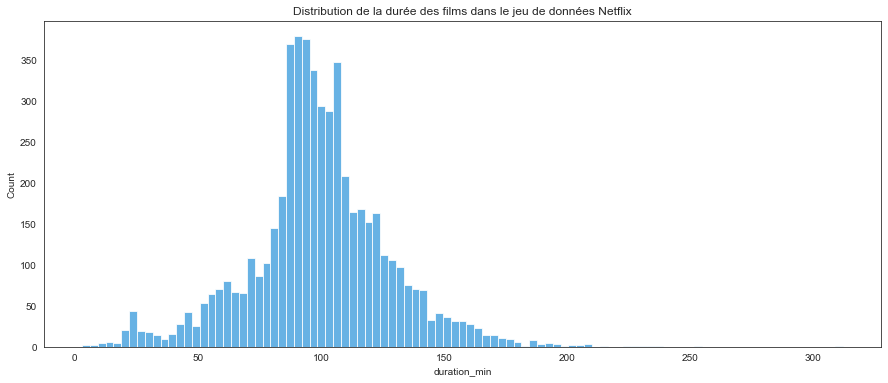

In [35]:
palette= sns.color_palette(["#3498db","#e74c3c"])
sns.set_palette(palette)
plt.figure(figsize=[15,6])
sns.histplot(movie['duration_min'])
plt.title("Distribution de la durée des films dans le jeu de données Netflix")
plt.show()

In [36]:
movie['duration_min'].describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_min, dtype: float64

La durée moyenne d'un film est de 100min soit 1h40. Il y a des mini-films courts sur Netflix ainsi que de très long films. 

# Graphique représentant le nombre de séries par modalité de nombre de saisons

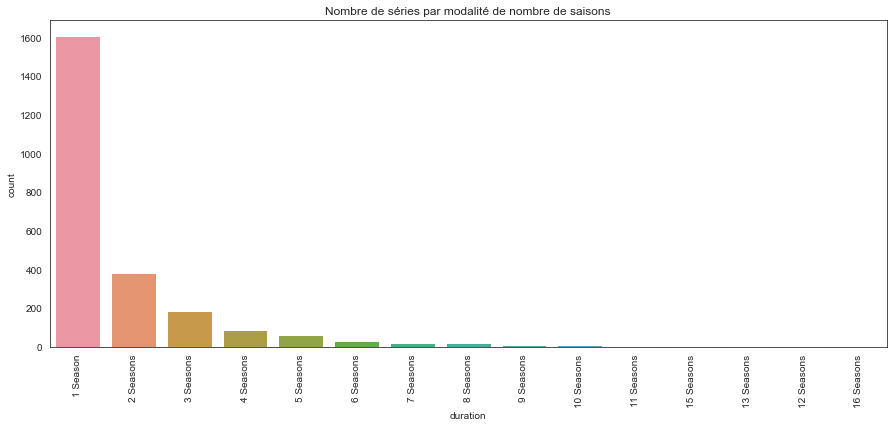

In [37]:
plt.figure(figsize=[15,6])
tv_show = netflix_data[netflix_data['type'] == 'TV Show']
sns.countplot(data=tv_show, x='duration', order=tv_show['duration'].value_counts().keys())
plt.title("Nombre de séries par modalité de nombre de saisons")
plt.xticks(rotation=90)
plt.show()

Un maximum de séries n'ont qu'une seule saison, cela est peut-être dû à un boom récent de la création de nouvelles séries sur Netflix et financées par Netflix ou parce-que beaucoup de séries n'ont pas le succès escompté et restent inachevées.

Le nombre maximum de saison est de 16, affichons les séries ayant ce nombre de saisons.


In [39]:
netflix_data[(netflix_data["duration"] == "16 Seasons")]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_year
show_id,,,,,,,,,,,,
s2539,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"May 9, 2020",2019,TV-14,16 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,2020.0


# Visualisation comique

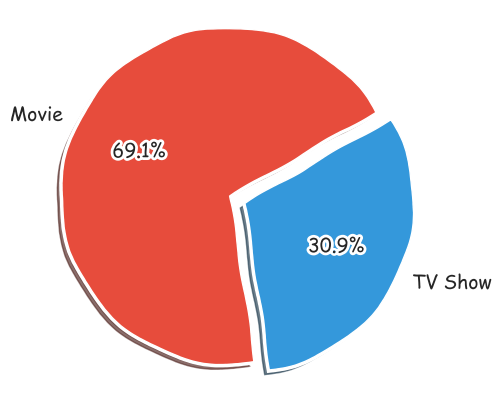

In [63]:
col = "type"
grouped = netflix_data[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col:"count", "index":col})
with plt.xkcd():
    explode = (0,0.1)
    fig1, ax1 = plt.subplots(figsize=(5,5), dpi=100)
    ax1.pie(grouped['count'], explode=explode, labels=grouped['type'], autopct='%1.1f%%', shadow=True, startangle=30)
    ax1.axis('equal')
    plt.show()

In [54]:
from collections import Counter
from matplotlib.pyplot import figure
import math

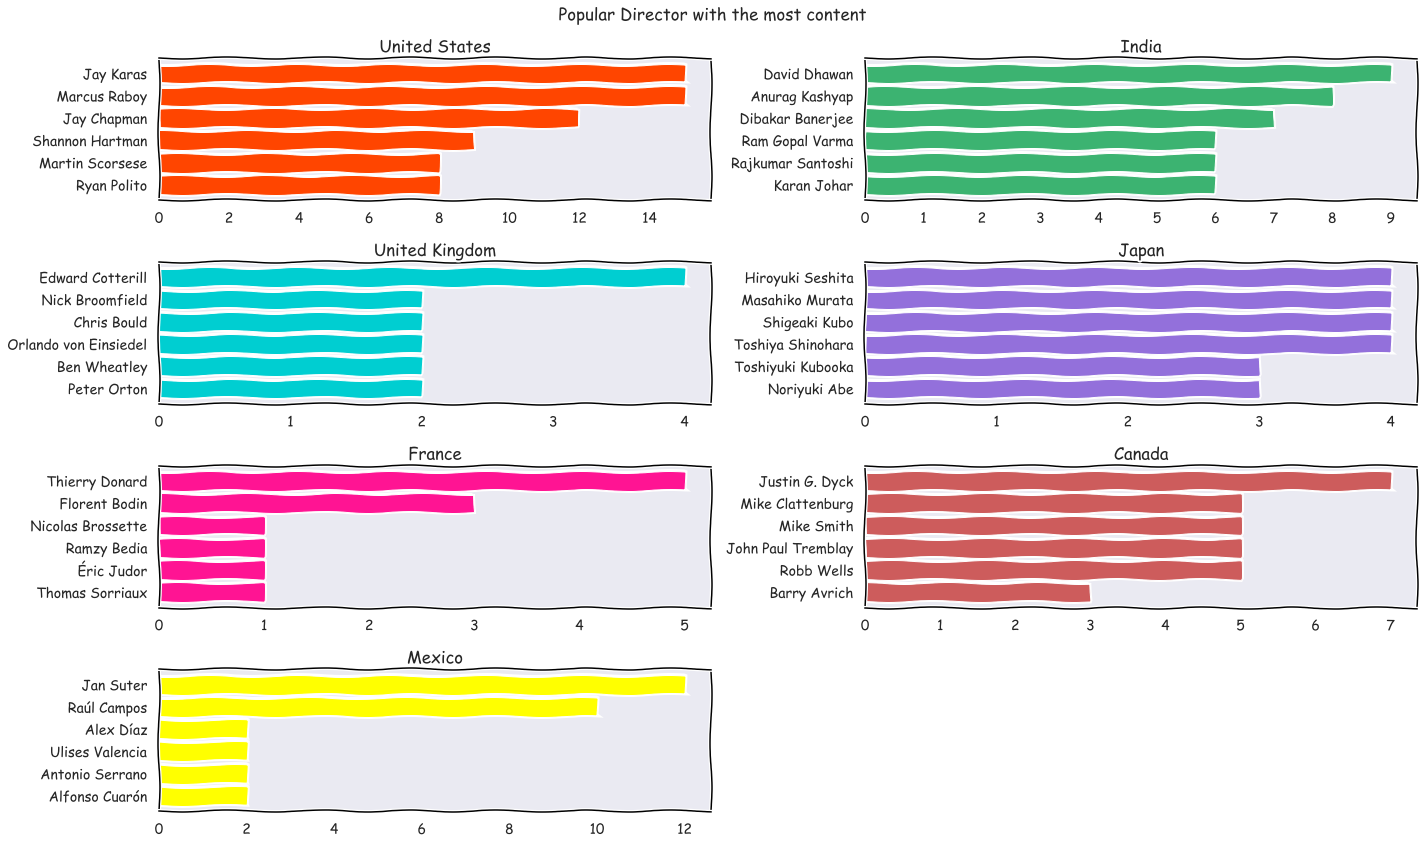

In [42]:
colours = ["orangered", "mediumseagreen", "darkturquoise", "mediumpurple", "deeppink", "indianred", "yellow"]
countries_list = ['United States', 'India', 'United Kingdom', 'Japan', 'France', 'Canada', 'Mexico']
col = 'director'
with plt.xkcd():
    figure(num=None, figsize=(20,12))
    x = 1
    for country in countries_list:
        country_df = netflix_data[netflix_data['country'] == country]
        categories = ", ".join(country_df[col].fillna("")).split(", ")
        counter_list = Counter(categories).most_common(7)
        counter_list = [_ for _ in counter_list if _[0] != ""]
        labels = [_[0] for _ in counter_list][::-1]
        values = [_[1] for _ in counter_list][::-1]
        if max(values) < 10:
            values_int = range(0, math.ceil(max(values))+1)
        else:
            values_int = range(0, math.ceil(max(values))+1, 2)
        plt.subplot(4, 2, x)
        plt.barh(labels, values, color = colours[x-1])
        plt.xticks(values_int)
        plt.title(country)
        x+=1
    plt.suptitle("Popular Director with the most content")
    plt.tight_layout()
    plt.show()